# <span style='font-family:"Times New Roman"'><font color='DeepPink4'> **Walmart Store Sales Analysis**

<img src = "https://upload.wikimedia.org/wikipedia/commons/d/d4/Walmart_store_exterior_5266815680.jpg" width=60%>

In [ ]:
#By Ysmin-G
#The dataset is also available to download through Kaggle

In [ ]:
#importing the libraries required for the analysis
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff


In [ ]:
#importing the dataset as dataframes
df_features=pd.read_csv("/content/Walmart data/features.csv")
df_stores=pd.read_csv("/content/Walmart data/stores.csv")
df_train=pd.read_csv("/content/Walmart data/train.csv")
df_test=pd.read_csv("/content/Walmart data/test.csv")

### <span style='font-family:"Times New Roman"'><font color='DeepPink4'> Exploring the features dataset

In [ ]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


#### <span style='font-family:"Times New Roman"'> We hereby know that there are no missing values in the dataset, and proceed to convert the columns of the dataset that have been identified as "object"s.

In [ ]:
#converting the date column
df_features["Date"] = pd.to_datetime(df_features["Date"])
df_features["Year"]=df_features.Date.dt.year
df_features["Year"]=df_features["Year"].astype(int)

#### <span style='font-family:"Times New Roman"'> We now go through the data, trying to understand the nature of the stores, their location (country, city), and factors that could help distinguish each store.

In [ ]:
#getting the weeks when holidays were defined
df_features["Date"].loc[df_features['IsHoliday'] == True]

1      2010-02-12
31     2010-09-10
42     2010-11-26
47     2010-12-31
53     2011-02-11
          ...    
8113   2012-02-10
8143   2012-09-07
8154   2012-11-23
8159   2012-12-28
8165   2013-02-08
Name: Date, Length: 585, dtype: datetime64[ns]

In [ ]:
#plotting average of temperatures per year of each store
temp_st = df_features.groupby(by=["Store", "Year"], as_index=False).agg({"Temperature": "mean"})
fig = px.bar(data_frame=temp_st,x="Store",y="Temperature",color="Year",barmode="group")
fig.show()

#### <span style='font-family:"Times New Roman"'> As seen in the plot above, although the majority of the stores have been established in warmer cities, some stores, such as store numbers 7 and 26, appear to be in colder locations, which could partially account for the sale figures that we are about to see.

### <span style='font-family:"Times New Roman"'><font color='DeepPink4'> Exploring the stores dataset

In [ ]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


#### <span style='font-family:"Times New Roman"'> We now try to understand more of the characteristics of the store types and how they are distinct from one another

In [ ]:
store_ty=pd.DataFrame(df_stores['Type'].value_counts(normalize=False)).reset_index().rename(columns = {'index':'Store_type','Type':'Count'})
sizes=df_stores.groupby('Type')['Size'].mean()
store_ty['Avg_store_size']=store_ty['Store_type'].map(sizes)
store_ty['color']=['#334668','#E89211','#B6206A']
store_ty

,Store_type,Count,Avg_store_size,color
0,A,22,177247.727273,#334668
1,B,17,101190.705882,#E89211
2,C,6,40541.666667,#B6206A


In [ ]:
#Plotting the percentage of stores of each type, the average size of each type of store
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "pie"}, {"type": "bar"}]],
                    subplot_titles=("Percentage of Store Types","Average Store Size based on Type"))

fig.add_trace(go.Pie(labels=store_ty['Store_type'], values=store_ty['Count'],textinfo='label',
                     name='store type', marker_colors=store_ty['color'], hole=0.5),1,1)
fig.add_trace(go.Bar(x=store_ty['Store_type'], y=store_ty['Avg_store_size'],marker=dict(color=store_ty['color'] ),name='Store Type'), 1, 2)

fig.update_layout(title_text='Store Types Data',showlegend=False)
fig.show()

#### <span style='font-family:"Times New Roman"'> Now that we know some more of the stores, the data gathered so far is attached together

In [ ]:
#Now that we have seen the info from both datasets, 
#the main info of both datasets is going to be attached
df_features=df_features.join(df_stores.set_index('Store'), on='Store')
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2010,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,2010,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,2010,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,2010,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,2010,A,151315


### <span style='font-family:"Times New Roman"'><font color='DeepPink4'> Exploring the train dataset

In [ ]:
df_train.shape

(421570, 5)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [ ]:
#First the Date column is converted to the date format
df_train["Date"] = pd.to_datetime(df_train["Date"])
df_train["Year"]=df_train.Date.dt.year
df_train["Month"]=df_train.Date.dt.month
df_train["Year"]=df_train["Year"].astype(int)
df_train["Month"]=df_train["Month"].astype(int)

In [ ]:
#Now we join the features dataframe with the train dataset for a more comprehensive EDA
df_features.drop(['IsHoliday', 'Year'], axis=1, inplace=True)
data = pd.merge(df_train, df_features, on=['Date','Store'],how='outer')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Year,Month,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1.0,2010-02-05,24924.50,False,2010.0,2.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2.0,2010-02-05,50605.27,False,2010.0,2.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3.0,2010-02-05,13740.12,False,2010.0,2.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4.0,2010-02-05,39954.04,False,2010.0,2.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5.0,2010-02-05,32229.38,False,2010.0,2.0,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
#the number of departments per store
store_dep = data.groupby(by=["Store"], as_index=False).agg({"Dept": "max"})
fig = px.bar(data_frame=store_dep,x="Store",y="Dept",color='Store')
fig.update_traces(marker_color='#A50505')
fig.show()

In [ ]:
#a log of the number of departments during the years is defined
store_dept_change=data.loc[data.groupby(['Year','Store'])['Dept'].idxmax()].reset_index(drop=True)
nodept_log=store_dept_change[['Store','Dept','Year','Type']]
nodept_log= nodept_log.sort_values(by=['Store','Year'])
nodept_log

,Store,Dept,Year,Type
0,1,99.0,2010.0,A
45,1,99.0,2011.0,A
90,1,99.0,2012.0,A
1,2,99.0,2010.0,A
46,2,99.0,2011.0,A
...,...,...,...,...
88,44,98.0,2011.0,C
133,44,98.0,2012.0,C
44,45,98.0,2010.0,B
89,45,98.0,2011.0,B


In [ ]:
#mean of the number of departments in 2012 for each store type that we have data on
stores_info_2012=nodept_log.loc[nodept_log['Year']==2012]
stores_info_latest=stores_info_2012.groupby(['Type'],as_index=False).agg({'Dept':'mean'})
stores_info_latest

,Type,Dept
0,A,99.000000
1,B,98.470588
2,C,98.666667


In [ ]:
nodept_log['diff'] = nodept_log.groupby(['Year','Store'])['Dept'].diff().fillna(0)

nodept_log['diff'] = nodept_log.apply(lambda x: x['Dept'] if x['Year'] < 2011 else x['diff'], axis=1)

#now checking the sum of non-zero values in the 'diff' column
#if the following statement is returned as true, then there have been no changes to analyze and plot
nodept_log['diff'].astype(bool).sum(axis=0)==nodept_log['Store'].max()

True

In [ ]:
#plotting the average monthly temperatures and sales

#first we get the total of weekly sales, average temperature, 
#Unemployment rate, and holiday status based on date, store, and month
total_stsales=data.groupby(['Store', 'Date'],as_index=False).agg({'Weekly_Sales':'sum','Temperature':'mean', 
                                                                  'Unemployment':'mean','IsHoliday':'mean', 'Dept':'max','CPI':'mean'})
total_stsales['Month']=total_stsales.Date.dt.month
total_stsales = pd.merge(total_stsales, df_stores, on=['Store'],how='outer')
total_stsales.head()

,Store,Date,Weekly_Sales,Temperature,Unemployment,IsHoliday,Dept,CPI,Month,Type,Size
0,1,2010-02-05,1643690.90,42.31,8.106,0.0,98.0,211.096358,2,A,151315
1,1,2010-02-12,1641957.44,38.51,8.106,1.0,98.0,211.242170,2,A,151315
2,1,2010-02-19,1611968.17,39.93,8.106,0.0,98.0,211.289143,2,A,151315
3,1,2010-02-26,1409727.59,46.63,8.106,0.0,98.0,211.319643,2,A,151315
4,1,2010-03-05,1554806.68,46.50,8.106,0.0,98.0,211.350143,3,A,151315


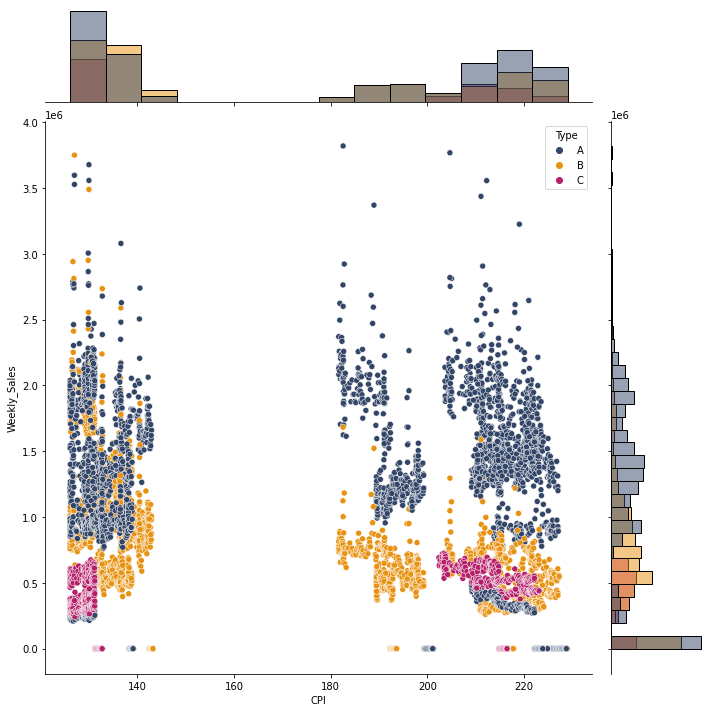

In [ ]:
#Now We plot the average Weekly sales of the stores and CPI based on store type

# Show the joint distribution using kernel density estimation
#for the store types, we use the palette list defined previously
g=sns.JointGrid(data=total_stsales,x="CPI", y="Weekly_Sales", 
              hue='Type',palette=['#334668','#E89211','#B6206A'],height=10)
g.plot(sns.scatterplot, sns.histplot)

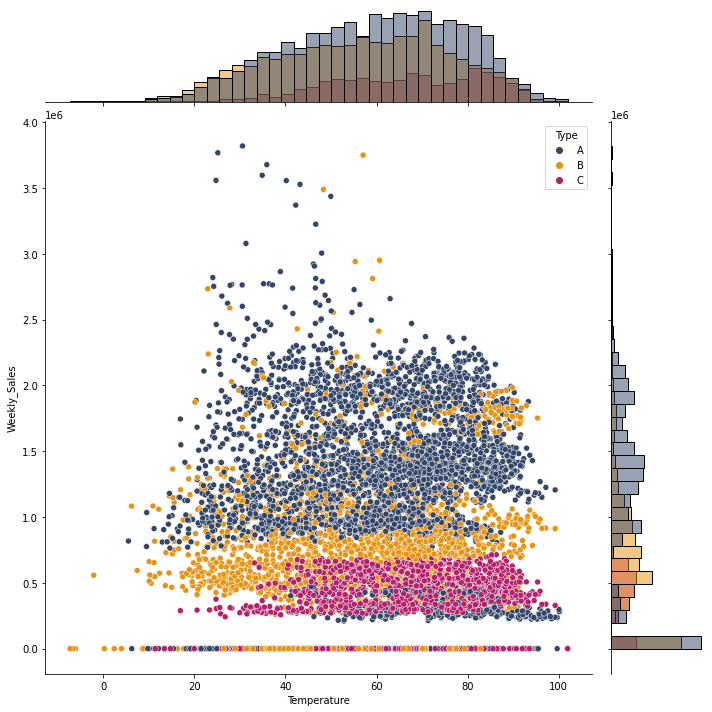

In [ ]:
#Now We plot the average Weekly sales of the stores and their temperatures based on store type

# Show the joint distribution using kernel density estimation
#for the store types, we use the palette list defined previously
g=sns.JointGrid(data=total_stsales,x="Temperature", y="Weekly_Sales", 
              hue='Type',palette=['#334668','#E89211','#B6206A'],height=10)
g.plot(sns.scatterplot, sns.histplot)

In [ ]:
#Now let's plot the Weekly sales and filter them based on whether they were during the holidays
#For this purpose we will be using plotly
holiday_sales=total_stsales[["Date",'Weekly_Sales','Type']].loc[total_stsales['IsHoliday'] == True]
holiday_sales=holiday_sales.groupby(['Type','Date'],as_index=False).agg({'Weekly_Sales':'sum'})
holiday_sales.sort_values(by='Date', ascending = True, inplace=True)


f = make_subplots(rows=len(total_stsales['Type'].unique()), cols=1, shared_xaxes=True)
row = 1
no_store=0
for store_type in ['A','B','C']:
  a=holiday_sales[["Date",'Weekly_Sales']].loc[holiday_sales['Type'] == store_type]
  f.add_trace(go.Scatter(x=a['Date'],y=a['Weekly_Sales'],marker_color=store_ty['color'][no_store], 
                         name='Store Type '+store_type),
              row=row, col=1)
  row += 1
  no_store+=1

f.update_layout(title_text='Store Types Weekly Sales during holidays')
f.show()

#### <span style='font-family:"Times New Roman"'> As seen above, for store types A and B the highest amount of sales in the holidays were related to the 26th of November of each year and on the national thanksgiving day in the U.S, an amount that had experienced a decline in December, and after that, both types have experienced nearly steady sales during the other holidays. On the other hand, for store type C, the highest amount of holiday sales happened on the 10th of February, which is most likely related to Super Bowl. 

In [ ]:
noholiday_sales=total_stsales[["Date",'Weekly_Sales','Type']].loc[total_stsales['IsHoliday'] == False]
noholiday_sales=noholiday_sales.groupby(['Type','Date'],as_index=False).agg({'Weekly_Sales':'sum'})
noholiday_sales.sort_values(by='Date', ascending = True, inplace=True)
f = make_subplots(rows=len(total_stsales['Type'].unique()), cols=1, shared_xaxes=True)
row = 1
no_store=0
for store_type in ['A','B','C']:
  b=noholiday_sales[["Date",'Weekly_Sales']].loc[noholiday_sales['Type'] == store_type]
  f.add_trace(go.Scatter(x=b['Date'],y=b['Weekly_Sales'],marker_color=store_ty['color'][no_store], 
                         name='Store Type '+store_type),
              row=row, col=1)
  row += 1
  no_store+=1

f.update_layout(title_text='Store Types Weekly Sales during non-holidays')
f.show()

#### <span style='font-family:"Times New Roman"'> As for the non-holidays, both of the store types of A and B happen to have similar sale patterns, although the sales of store A is nearly twice of those of store B. Also, the unsteadiest amount of sales can be seen to have occurred in stores of type C. The highest amount of sales of all stores happens to be in the last week of the years in study. 

In [ ]:
#now for the Fuel Prices and Weekly sales
fuel_sales=data.groupby(['Type','Fuel_Price'],as_index=False).agg({'Weekly_Sales':'sum'})
fuel_sales.sort_values(by='Fuel_Price', ascending = True, inplace=True)
fi = px.scatter(fuel_sales,x=fuel_sales['Fuel_Price'],y=fuel_sales['Weekly_Sales'],
                color='Type',trendline='ols',color_discrete_sequence=['#334668','#E89211','#B6206A'])
fi.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



#### <span style='font-family:"Times New Roman"'>In terms of the relationship between fuel prices and weekly sales, all store types have naturally shown a negative attitude towards the rise of fuel prices.

In [ ]:
#we could also use another similar plotting method for unemployment
unemploy_sales=total_stsales.groupby(['Type','Unemployment'],as_index=False).agg({'Weekly_Sales':'sum'})
unemploy_sales.sort_values(by='Unemployment', ascending = True, inplace=True)
fi = px.scatter(unemploy_sales,x=unemploy_sales['Unemployment'],y=unemploy_sales['Weekly_Sales'],
                color='Type',trendline='ols',color_discrete_sequence=['#334668','#E89211','#B6206A'])
fi.show()

#### <span style='font-family:"Times New Roman"'>In terms of the weekly sales of stores and the unemployment rates, store types A and B both show a higher amount of weekly sales, something that could hint a higher purchasing power in comparison to store C, but requires more information of the stores characteristics. 

In [ ]:
#now let's go back to the data dataframe where all the information we have has been accumulated
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Year', 'Month',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

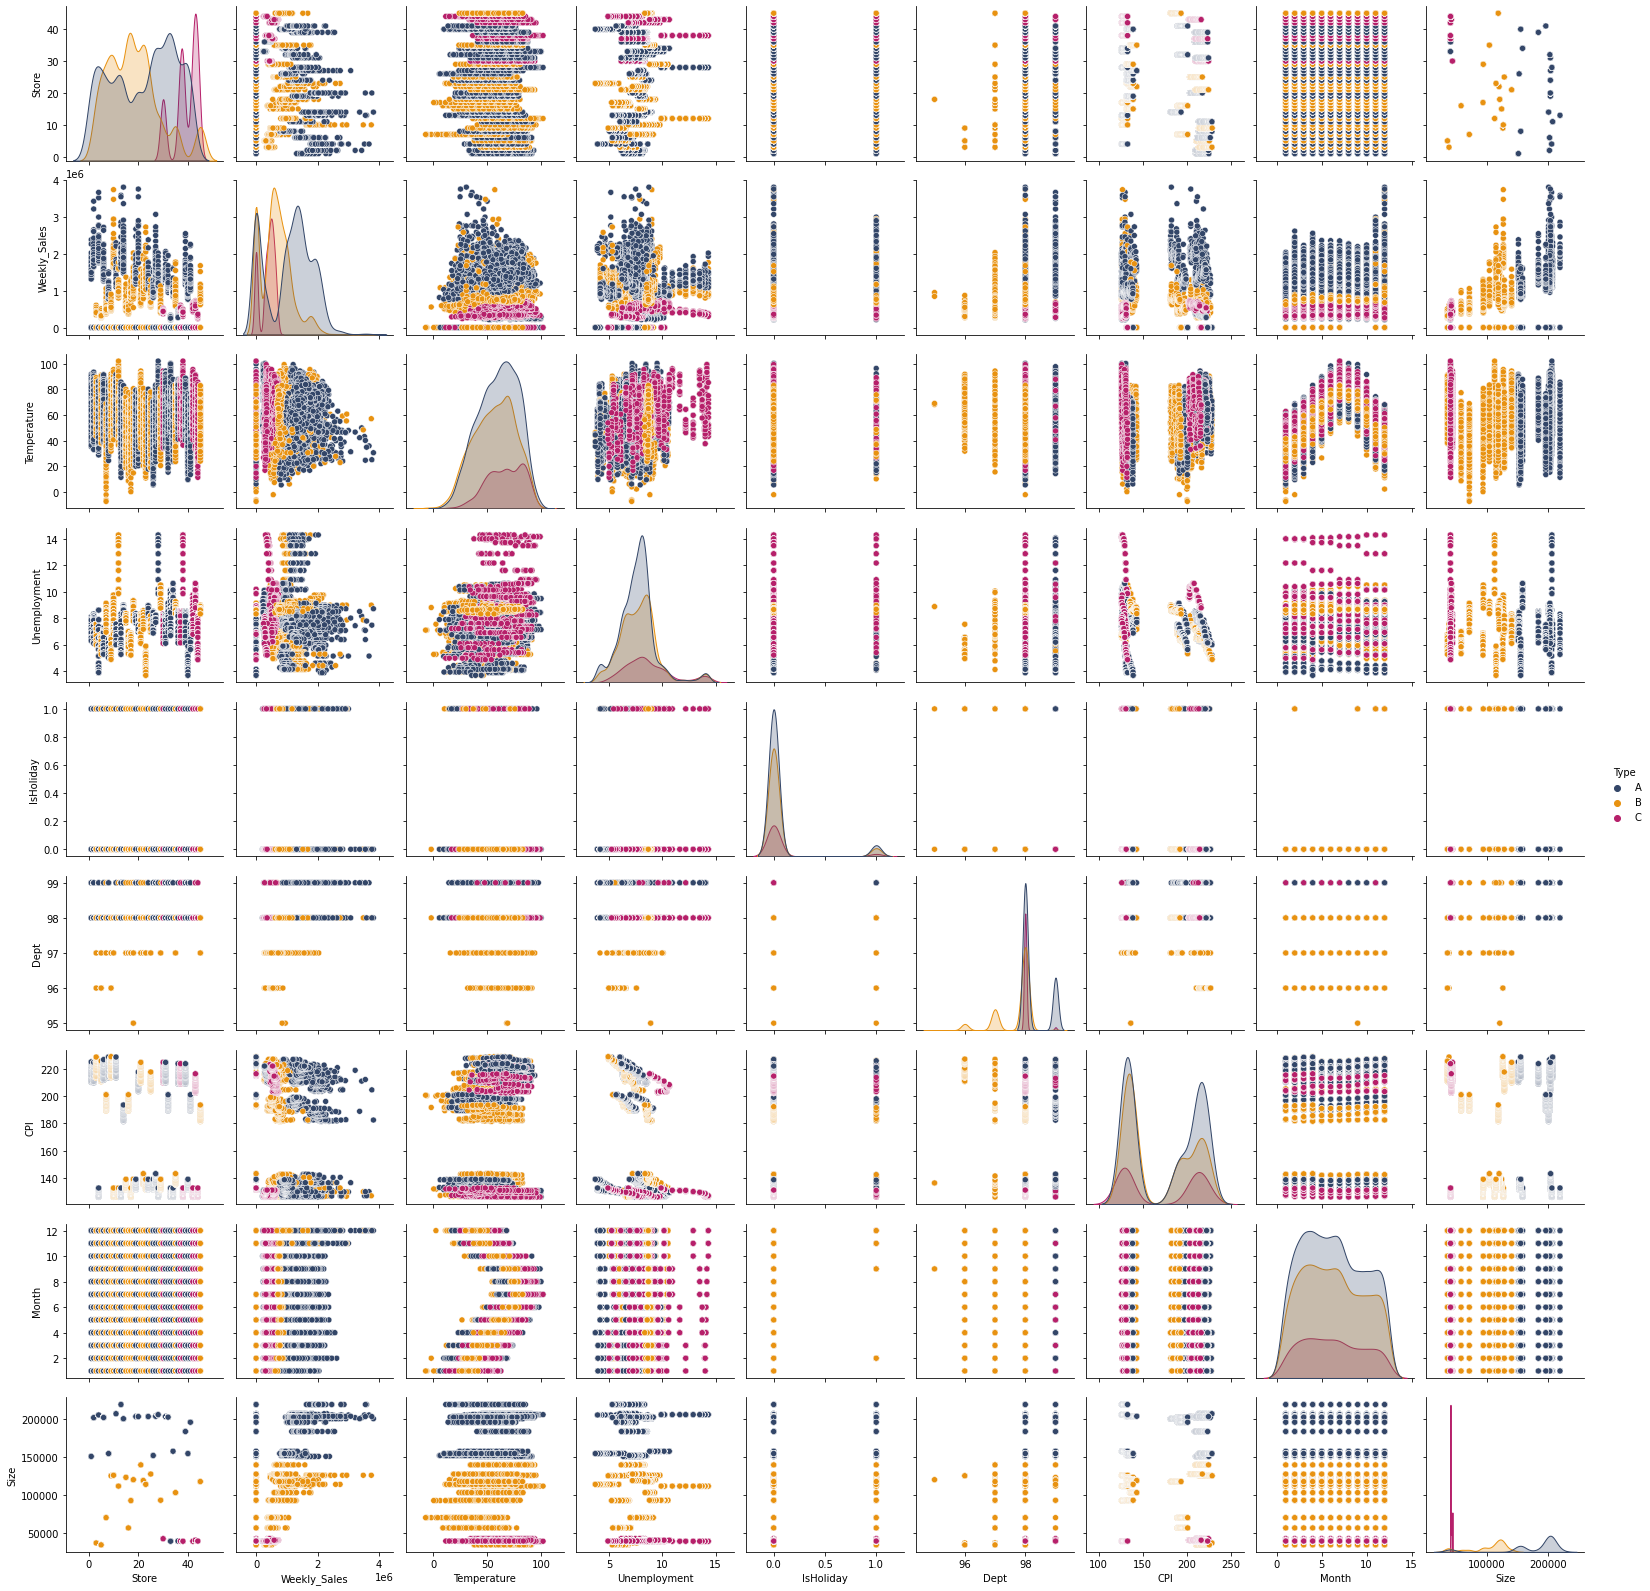

In [ ]:
#An overview of the interrelations
sns.pairplot(total_stsales, hue="Type", palette=['#334668','#E89211','#B6206A'])

### <span style='font-family:"Times New Roman"'><font color='DeepPink4'> Considering the dataset and the EDA, these are the final notes that could be made:

<span style='font-family:"Times New Roman"'>* All store types appear to have nearly the same average department values, and there have been no expansion or reduction plans throughout the years in the dataset.

<span style='font-family:"Times New Roman"'>* The majority of stores are of Type A. These stores are also the biggest stores in comparison to the two other store types. 

<span style='font-family:"Times New Roman"'>* Stores of type C happen to be among the smallest of stores, and compared to store types A and B, fewer stores happen to be of this type.

<span style='font-family:"Times New Roman"'>* There were similar sale patterns in stores of type A and B during both holidays and non-holidays, and the peak in weekly sales is during the last two weeks of December. In comparison, store type C showed the unsteadiest amount of sales and the lowest, with sales reaching the highest around the Super Bowl during the holidays, and increasing after 2012.

<span style='font-family:"Times New Roman"'>*Store A has the highest amount of weekly sales among the three store types, an amount that appears the highest during increased unemployment rates, and high CPI values, indicating a perhaps stronger purchasing power of the stores.



